In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings("ignore")
from matplotlib import gridspec
import seaborn as sns

In [2]:
files_image = np.append(glob.glob('Tables/*cifar*xlsx'), glob.glob('Tables/*mnist*xlsx'))

In [3]:
files_image

array(['Tables/cifar10_resnet_6.xlsx', 'Tables/cifar10_vgg_6.xlsx',
       'Tables/mnist_basic_6.xlsx'], dtype='<U28')

In [4]:
dc_names = ['CIFAR-10 ResNet', 'CIFAR-10 VGG', 'MNIST NN']

In [5]:
def read(whichOne):
    print("reading", files_image[whichOne])
    df = pd.read_excel(files_image[whichOne], engine='openpyxl', header=1)
    df = df.drop(0)
    df_acc = df.iloc[:5,1:8]
    df_fpr = df.iloc[:5,[1,8,9,10,11,12,13]]
    df_acc.columns = ['param', 'BAARD (2)', 'BAARD (3)', 'FS', 'LID', "MagNet", 'RC'] 
    df_fpr.columns = df_acc.columns
    df['Dataset and Classifier'] = dc_names[whichOne]
    return df_acc#, df_fpr

In [136]:
df_acc

,param,BAARD (2),BAARD (3),FS,LID,MegNet,RC
1,0.063,100.0,100.0,99.8,80.8,100.0,87.6
2,0.3,100.0,100.0,92.0,43.1,100.0,0.0
3,0.6,100.0,100.0,6.7,60.0,100.0,0.0
4,1,100.0,100.0,0.3,71.3,100.0,0.0
5,1.5,100.0,100.0,0.3,74.8,100.0,0.0


In [6]:
cols = ["#52952c",
"#80d358",
"#328dee",
"#d7a532",
"#d5702e",
"#b166d0"]

reading Tables/cifar10_vgg_6.xlsx


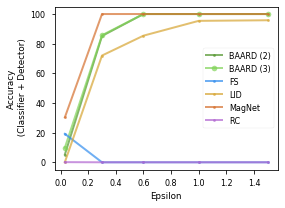

In [7]:
# CIFAR VGG
df_acc = read(1)
plt.style.use('seaborn-paper')
palette = plt.get_cmap('Set2')
plt.figure(figsize=(4,3))
for i in range(1, len(df_acc.columns)):
    marker = 'o' if i==2 else '.'
    plt.plot('param', df_acc.columns[i], data=df_acc, marker=marker, alpha=0.7, linewidth=2, c=cols[i-1])
plt.xlabel("Epsilon")
plt.ylabel("Accuracy\n (Classifier + Detector)")
plt.legend()
plt.savefig('Plots/AdvParam_CIFAR_VGG.pdf', format='pdf', dpi=1200, bbox_inches='tight')

reading Tables/cifar10_resnet_6.xlsx


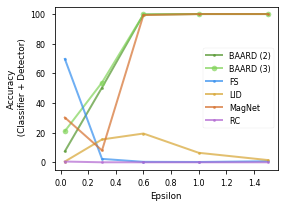

In [8]:
# CIFAR ResNet
df_acc = read(0)
plt.figure(figsize=(4,3))
for i in range(1, len(df_acc.columns)):
    marker = 'o' if i==2 else '.'
    plt.plot('param', df_acc.columns[i], data=df_acc, marker=marker, alpha=0.7, linewidth=2, c=cols[i-1])
plt.xlabel("Epsilon")
plt.ylabel("Accuracy\n (Classifier + Detector)")
plt.legend()
plt.savefig('Plots/AdvParam_CIFAR_ResNet.pdf', format='pdf', dpi=1200, bbox_inches='tight')

reading Tables/mnist_basic_6.xlsx


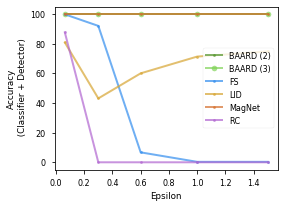

In [13]:
# MNIST
df_acc = read(2)
plt.figure(figsize=(4,3))
for i in range(1, len(df_acc.columns)):
    marker = 'o' if i==2 else '.'
    plt.plot('param', df_acc.columns[i], data=df_acc, marker=marker, alpha=0.7, linewidth=2, c=cols[i-1])
plt.xlabel("Epsilon")
plt.ylabel("Accuracy\n (Classifier + Detector)")
plt.legend()
plt.savefig('Plots/AdvParam_MNIST.pdf', format='pdf', dpi=1200, bbox_inches='tight')

#### Summarize all plots into one

In [11]:
df0 = read(0)
df1 = read(1)
df2 = read(2)

reading Tables/cifar10_resnet_6.xlsx
reading Tables/cifar10_vgg_6.xlsx
reading Tables/mnist_basic_6.xlsx


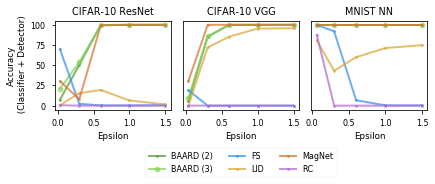

In [14]:
f, ax = plt.subplots(1,3, figsize=(6,2))

for i in range(1, len(df0.columns)):
    marker = 'o' if i==2 else '.'
    l0, = ax[0].plot('param', df0.columns[i], data=df0, alpha=0.7, marker=marker, linewidth=2, c=cols[i-1])
    l1, = ax[1].plot('param', df1.columns[i], data=df1, alpha=0.7, marker=marker, linewidth=2, c=cols[i-1])
    l2, = ax[2].plot('param', df2.columns[i], data=df2, alpha=0.7, marker=marker, linewidth=2, c=cols[i-1])
    
ax[0].set_xlabel('Epsilon')
ax[1].set_xlabel('Epsilon')
ax[2].set_xlabel('Epsilon')
ax[0].set_ylabel("Accuracy\n (Classifier + Detector)")
ax[0].set_title(dc_names[0])
ax[1].set_title(dc_names[1])
ax[2].set_title(dc_names[2])
ax[1].set_yticks([])
ax[2].set_yticks([])

#ax[1].legend(handles=[l0,l1,l2], )

plt.tight_layout(pad=0.5)
ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.8), ncol=3, frameon=1)
plt.savefig('Plots/AdvParam_all.pdf', format='pdf', dpi=1200, bbox_inches='tight')